In [237]:
%matplotlib inline

import os 
import librosa
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf
import extract_syllable_duration_4 as esd
import plots as my_plots

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

#from extract_syllable_duration_4 import autodetec, dilate_both_and

importlib.reload(util)
importlib.reload(ggf)
importlib.reload(esd)
importlib.reload(my_plots)


<module 'plots' from '/var/tmp/ff/tcc/code/plots.py'>

In [23]:
PICS_DIR = util.PICS_DIR + '/'

In [ ]:
y, sr = librosa.load('../dataset/pr_article/S_A_C_Base_Parte-1/Automolus leucophthalmus/song/100066.mp3') 
D = librosa.stft(y, n_fft=5000, hop_length=1)
print(np.size(D))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

#pp = PdfPages(PICS_DIR + 'exemplo_espectro.pdf')
#pp.savefig(plot1)
#pp.close()

485476613


In [ ]:
y, sr = librosa.load('../dataset/monografia/exemploFringilla coelebs.mp3')

D = librosa.stft(y[20000:90000])

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
plt.colorbar(format='%+2.0f dB')
plot1 = plt.tight_layout()

#pp = PdfPages(PICS_DIR + 'exemplo_espectro_hierarquia.pdf')
#pp.savefig(plot1)
#pp.close()

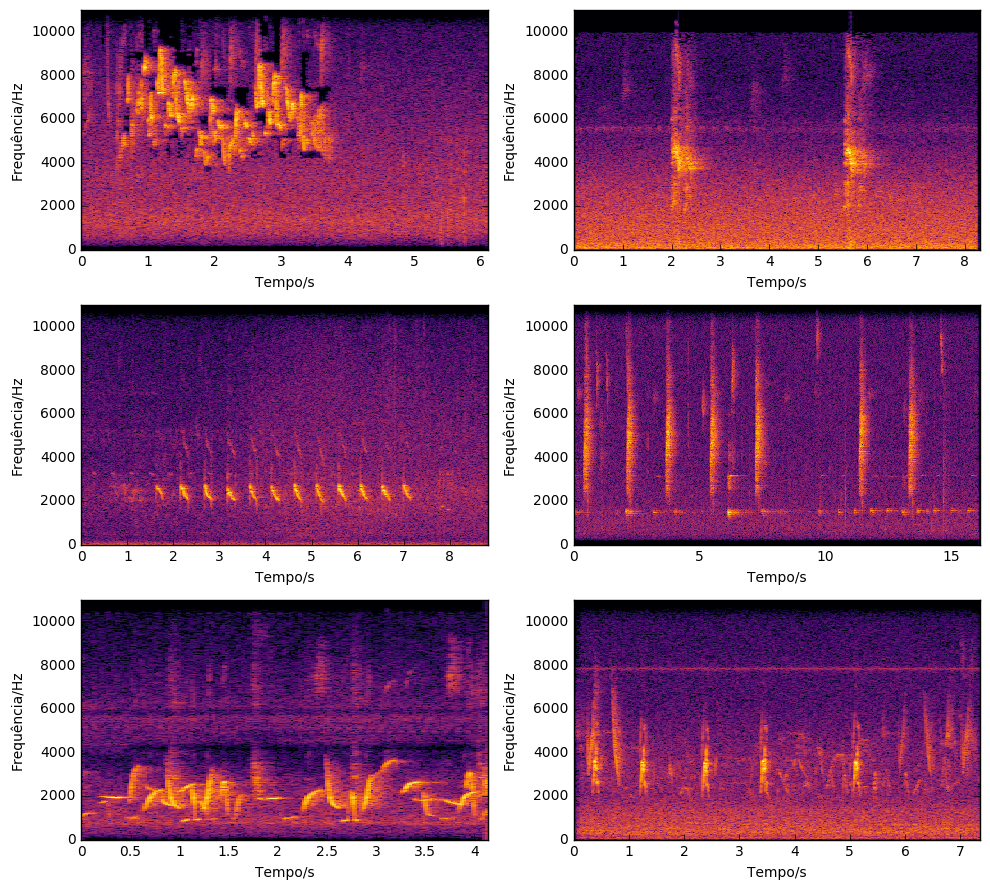

In [92]:
y1, sr1 = librosa.load('../dataset/monografia/XC112925 - Ochraceous Wren - Troglodytes ochraceus.mp3')
y2, sr2 = librosa.load('../dataset/monografia/XC223128 - Narrow-billed Antwren - Formicivora iheringi.mp3')
y3, sr3 = librosa.load('../dataset/monografia/XC261074 - Whiskered Wren - Pheugopedius mystacalis mystacalis.mp3')
y4, sr4 = librosa.load('../dataset/monografia/Call_Brotogeris_tirica_PNT_180605.mp3')
y5, sr5 = librosa.load('../dataset/monografia/Call_Cichlocolaptes leucophrus.mp3')
y6, sr6 = librosa.load('../dataset/monografia/Call_Myiophobus%20fasciatus.mp3')


D1 = librosa.stft(y1[:int(len(y1)/3)])
D2 = librosa.stft(y2[2000:int(len(y2)/8)])
D3 = librosa.stft(y3[40000:int(len(y3)/2)])
D4 = librosa.stft(y4[:int(len(y4)/1)])
D5 = librosa.stft(y5[:int(len(y5)/1)])
D6 = librosa.stft(y6[:int(len(y6)/1)])

fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(321)
librosa.display.specshow(librosa.amplitude_to_db(D1, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax2 = fig.add_subplot(323)
librosa.display.specshow(librosa.amplitude_to_db(D2, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')

ax3 = fig.add_subplot(325)
librosa.display.specshow(librosa.amplitude_to_db(D3, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax4 = fig.add_subplot(322)
librosa.display.specshow(librosa.amplitude_to_db(D4, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


ax5 = fig.add_subplot(324)
librosa.display.specshow(librosa.amplitude_to_db(D5, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')

ax6 = fig.add_subplot(326)
librosa.display.specshow(librosa.amplitude_to_db(D6, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')

#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')
#plt.colorbar(format='%+2.0f dB')


plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_espectros_cantos_chamadas.pdf')
pp.savefig(plot)
pp.close()

In [110]:
y, sr = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/experimentos_100/Trogon surrucura/song/10098-2.wav.filtered1.wav')
D = librosa.stft(y)


In [147]:
y_new = esd.autodetec(y, 2, 0.2, 'signal')

<- autodetec
-> autodetec


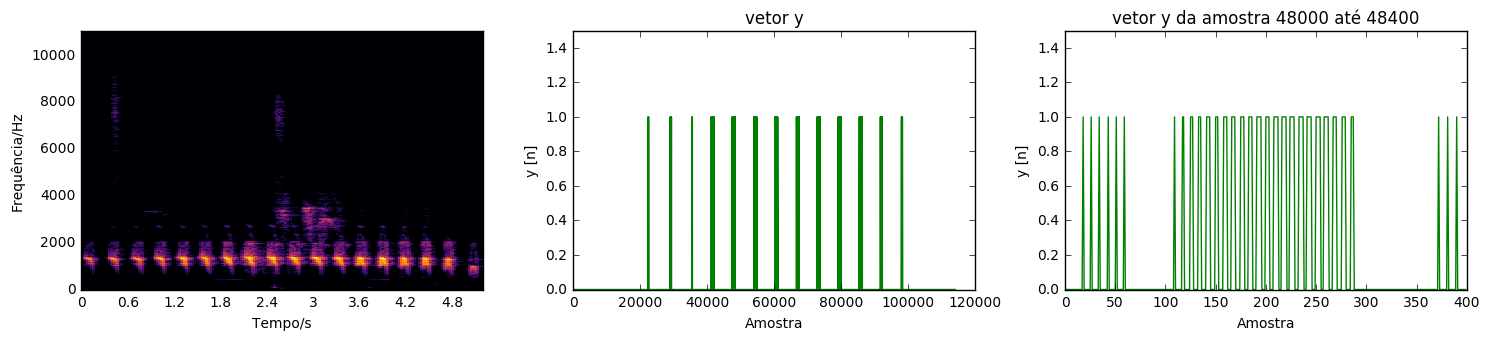

In [112]:

# zoom
# plt.plot(y_new[48000:48400], 'g')
fig = plt.figure(figsize=(15,3.5))
ax = fig.add_subplot(131)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
#plt.title('Espectrograma')
plt.xlabel('Tempo/s')
plt.ylabel('Frequência/Hz')

ax = fig.add_subplot(132)
plt.ylim([0,1.5])
plt.plot(y_new, 'g')
plt.title('vetor y')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

ax = fig.add_subplot(133)
plt.ylim([0,1.5])
plt.plot(y_new[48000:48400], 'g')
plt.title('vetor y da amostra 48000 até 48400')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'vetor_y_com_y_zoom.pdf')
pp.savefig(plot)
pp.close()

In [148]:
y_d = esd.dilate_both_and(y_new)

<- dilate_both_and
<- estimate_struc_size
estimate_struc_size ->
         samples: 114176
         struc size in dilation: 62
         starting dilations
         finished first dilation
         finished second dilation
dilate_both_and ->


In [173]:
def filter_in_y(y_d, min_dur):
    y = y_d.copy()
    durations = []
    N = len(y)
    i = 0
    init = 0
    end = 0
    syllable = y[0] == 1

    while (i < N):
        if (y[i] == 1 and not syllable):
            init = i
            syllable = True
        if (y[i] == 0 and syllable):
            end = i - 1
            if end - init < min_dur:
                #print("aqui")
                #print("init: {}, end: {}".format(init, end))
                y[init:end+1] = 0
            else:
                durations += [end - init]
            syllable = False
        i += 1
    print("<- durations_syllable")
    return y


In [184]:
y_f = filter_in_y(y_d, 600)

<- durations_syllable


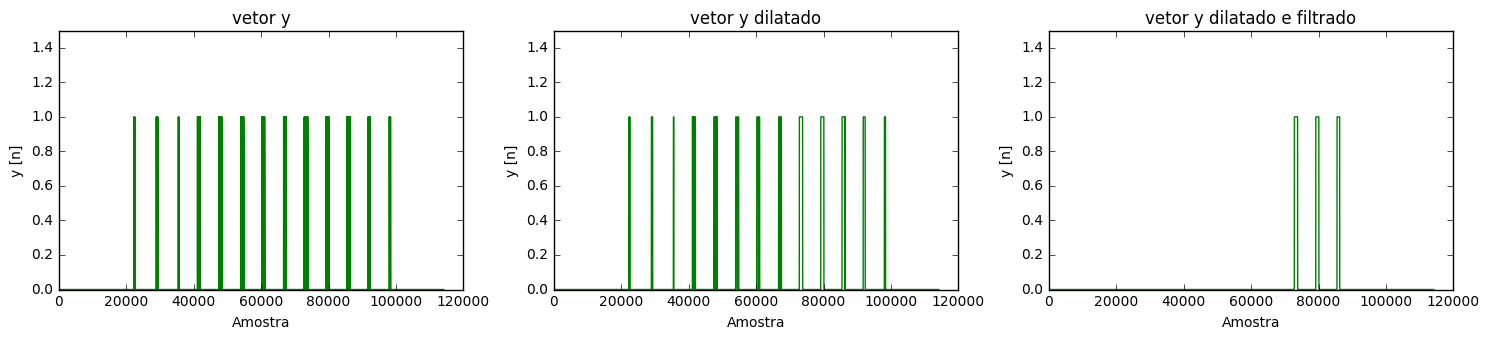

In [186]:

# zoom
# plt.plot(y_new[48000:48400], 'g')
fig = plt.figure(figsize=(15,3.5))
ax = fig.add_subplot(131)
plt.ylim([0,1.5])
plt.plot(y_new, 'g')
plt.title('vetor y')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

ax = fig.add_subplot(132)
plt.ylim([0,1.5])
plt.plot(y_d, 'g')
plt.title('vetor y dilatado')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

ax = fig.add_subplot(133)
plt.ylim([0,1.5])
plt.plot(y_f, 'g')
plt.title('vetor y dilatado e filtrado')
plt.xlabel('Amostra')
plt.ylabel('y [n]')

plot = fig.tight_layout()

pp = PdfPages(PICS_DIR + 'vetor_y_com_y_dilatado.pdf')
pp.savefig(plot)
pp.close()

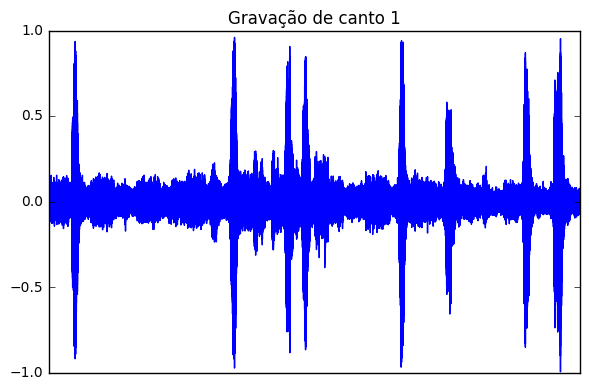

In [59]:
y, sr = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000481.mp3')

plt.xticks([])
plt.title('Gravação de canto 1')
plt.plot(y)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao1.pdf')
pp.savefig(plot)
pp.close()

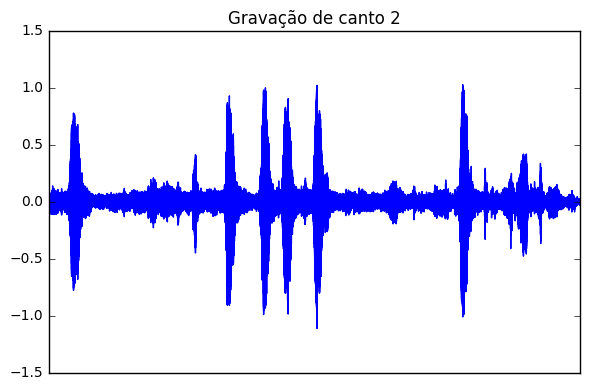

In [60]:
y1, sr1 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000482.mp3')

plt.xticks([])
plt.title('Gravação de canto 2')
plt.plot(y1)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao2.pdf')
pp.savefig(plot)
pp.close()

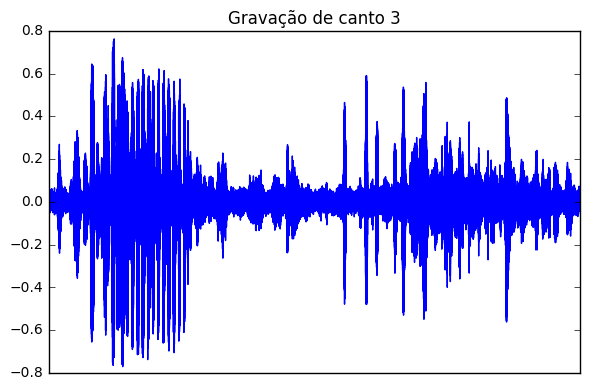

In [61]:
y2, sr2 = librosa.load('/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/song/1000483.mp3')

plt.xticks([])
plt.title('Gravação de canto 3')
plt.plot(y2)
plot = plt.tight_layout()
pp = PdfPages(PICS_DIR + 'gravacao3.pdf')
pp.savefig(plot)
pp.close()

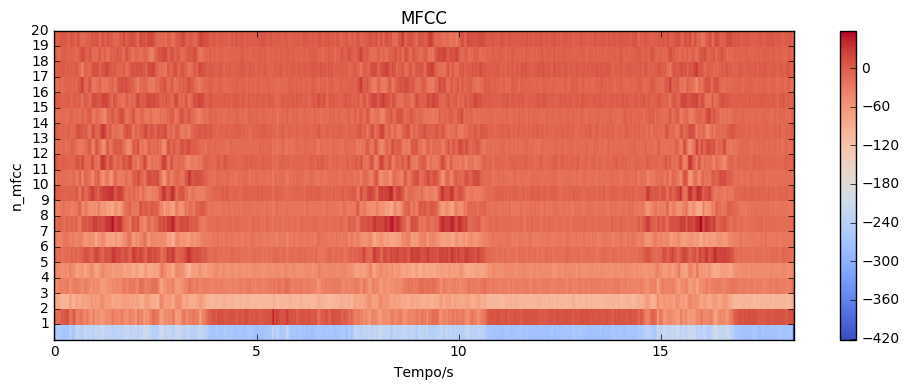

In [25]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Tempo/s')
plt.ylabel('n_mfcc')
plt.yticks(np.arange(1,21))

plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_MFCC.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


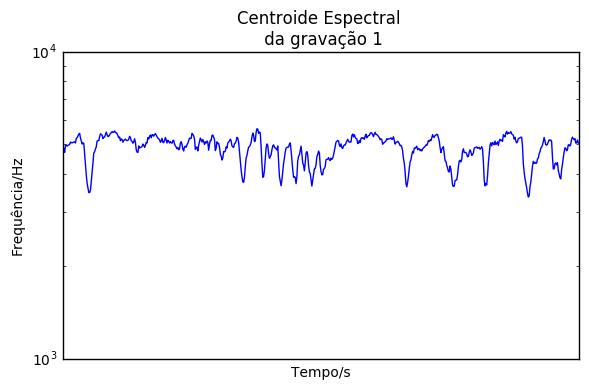

In [57]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 1')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS1.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


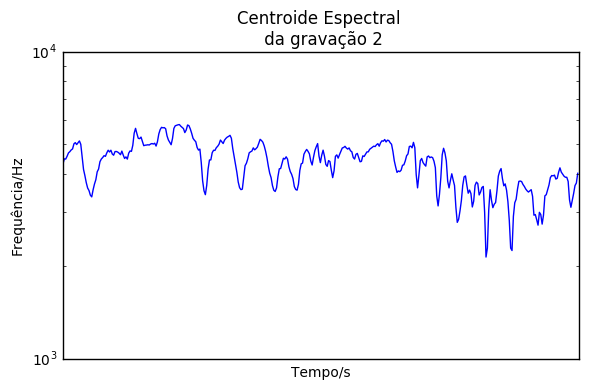

In [56]:
cent = librosa.feature.spectral_centroid(y=y1, sr=sr1)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 2')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS2.pdf')
pp.savefig(plot)
pp.close()

/Users/felipefelix/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


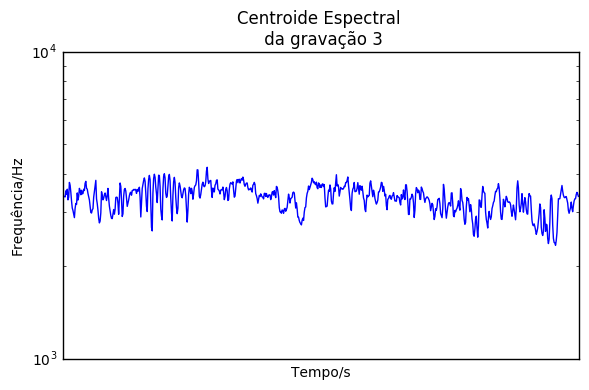

In [55]:
cent = librosa.feature.spectral_centroid(y=y2, sr=sr2)
plt.semilogy(cent.T)
plt.title('Centroide Espectral \n da gravação 3')
plt.ylabel('Frequência/Hz')
plt.xlabel('Tempo/s')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plot = plt.tight_layout()

pp = PdfPages(PICS_DIR + 'exemplo_CS3.pdf')
pp.savefig(plot)
pp.close()

In [27]:
#print(util.EXPERIMENTS_DIR+'/hashes/1.txt')
a = open(util.EXPERIMENTS_DIR+'/hashes/1.txt')
hashes = []
for l in a.readlines():
    if l != '\n':
        hashes.append(eval(l))


In [26]:
def lists_from_dicts(dicts):
    res = {}
    while len(dicts) > 0:
        lines = []
        ds = []
        current = dicts[0]

        for d in dicts:
            if d['dirs'] == current['dirs'] and d['version'] == current['version'] and d['num_exp'] == current['num_exp']:
                ds.append(d)

        for d in ds:
            dicts.remove(d)
            lines.append([d['version'], d['n_species'], d['feat'], d['knn'], d['gnb'], d['svm']])
        print(lines)        

In [267]:
all_data3 = my_plots.matrix_from_table('../experiments/hashes/3spc.txt')

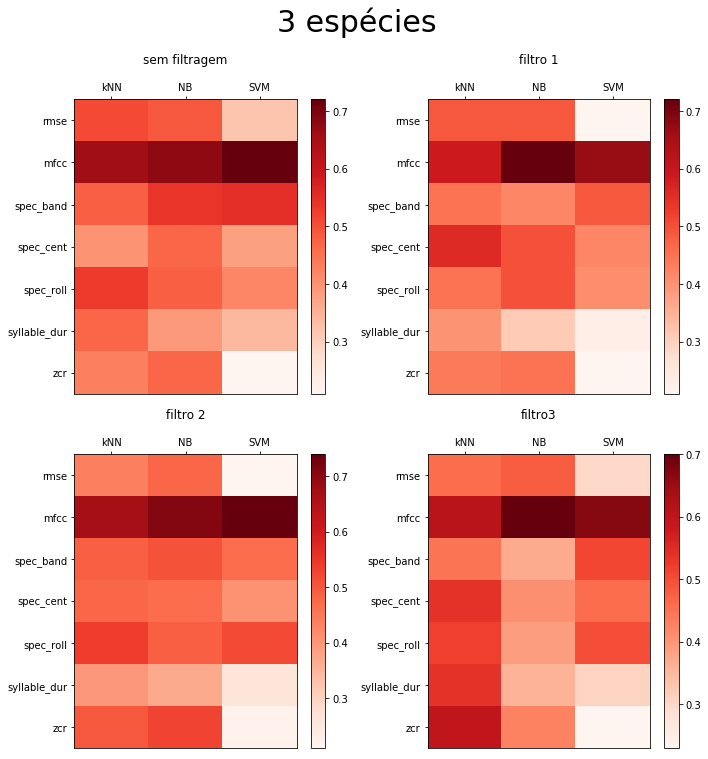

In [268]:
my_plots.color_plot_data(all_data3, '3 espécies')

[[ 0.51  0.72  0.55  0.47  0.53  0.47  0.47]
 [ 0.49  0.72  0.49  0.56  0.5   0.4   0.45]
 [ 0.48  0.74  0.51  0.48  0.54  0.4   0.53]
 [ 0.48  0.7   0.51  0.54  0.52  0.54  0.6 ]]


'\ntitles = [\'sem filtragem\', \'filtro 1\', \'filtro 2\', \'filtro3\']\nplt.figure(figsize=(10,5))\nax = plt.subplot()\nheatmap = ax.pcolor(data, cmap=plt.cm.Reds,)\n\nax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)\nax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)\n\nax.invert_yaxis()\nax.xaxis.tick_top()\n\nax.set_xticklabels(util.FEATURES_PLOT, minor=False)\nax.set_yticklabels([\'sem filtro\', \'filtro1\', \'filtro2\', \'filtro3\'], minor=False)\nplt.colorbar(mappable=heatmap, ax=ax)\nplt.title("Gráfico versão x feature = max(feature da versão)\n\n")\nplt.tight_layout()\n#plt.title("{}\n\n".format(titles[n_fig - 1]))\n'

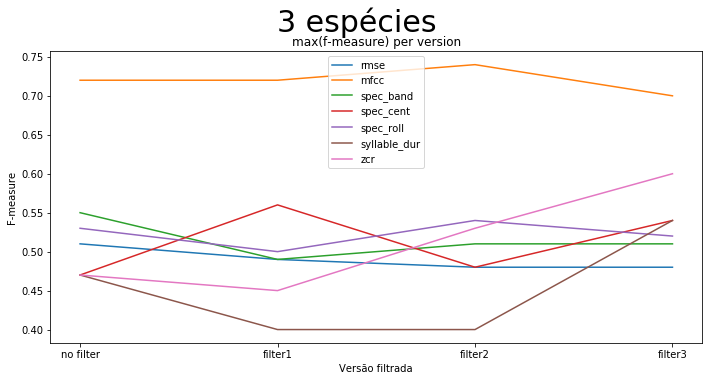

In [297]:
#print(all_data)
#print(all_data[0])
#print(np.max(all_data[0],axis=1))
def max_f_per_version(all_data):
    
    data_f = []
    for data in all_data:
        data_f.append(np.max(data,axis=1))
    data_f = np.array(data_f)
    return data_f

data = max_f_per_version(all_data3)
print(data)
my_plots.line_plot_data([data], 1, 1, '3 espécies',['max(f-measure) per version'], 'Versão filtrada', 'F-measure', util.FEATURES_PLOT, ['no filter', 'filter1', 'filter2', 'filter3'] )
'''
titles = ['sem filtragem', 'filtro 1', 'filtro 2', 'filtro3']
plt.figure(figsize=(10,5))
ax = plt.subplot()
heatmap = ax.pcolor(data, cmap=plt.cm.Reds,)

ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(util.FEATURES_PLOT, minor=False)
ax.set_yticklabels(['sem filtro', 'filtro1', 'filtro2', 'filtro3'], minor=False)
plt.colorbar(mappable=heatmap, ax=ax)
plt.title("Gráfico versão x feature = max(feature da versão)\n\n")
plt.tight_layout()
#plt.title("{}\n\n".format(titles[n_fig - 1]))
'''

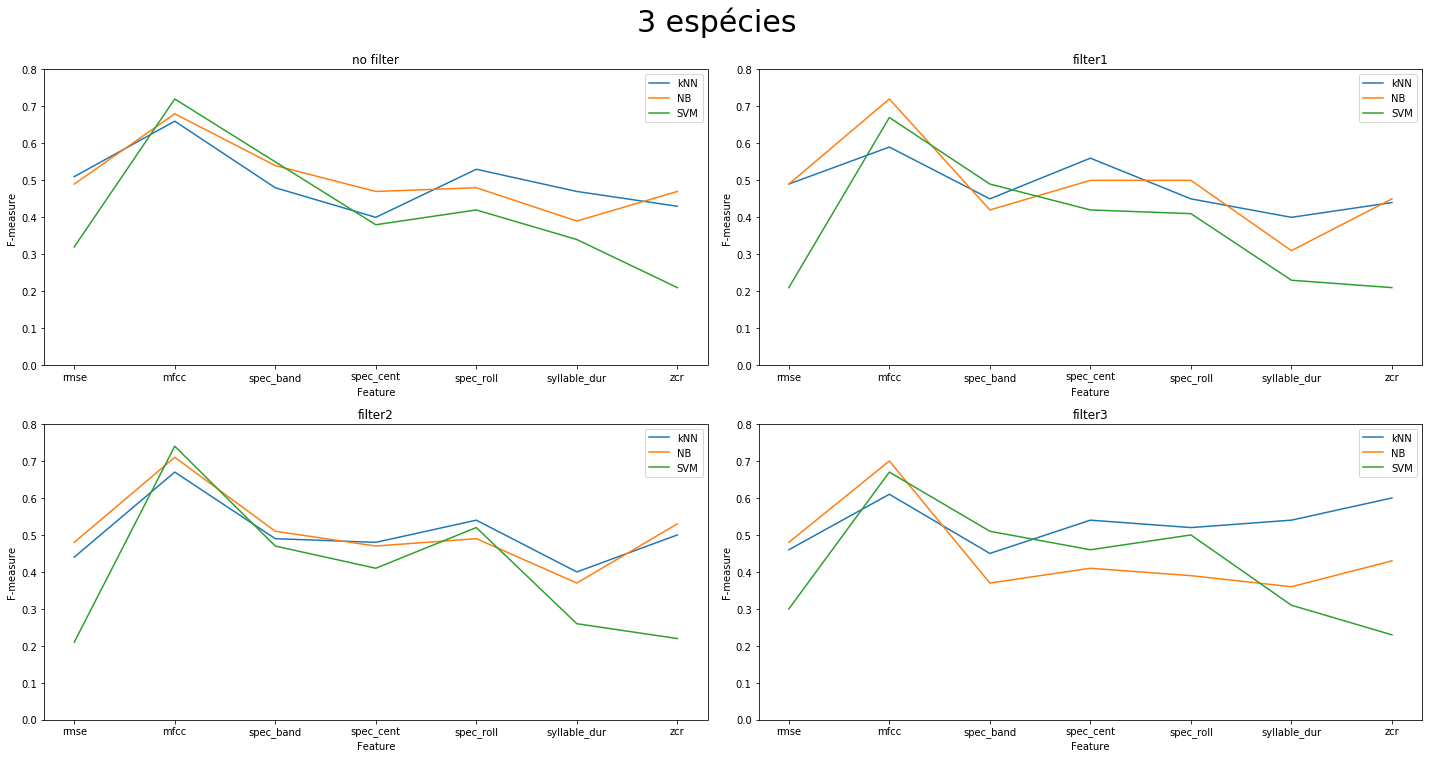

In [317]:
importlib.reload(my_plots)
my_plots.line_plot_data(all_data3, 2, 2, '3 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

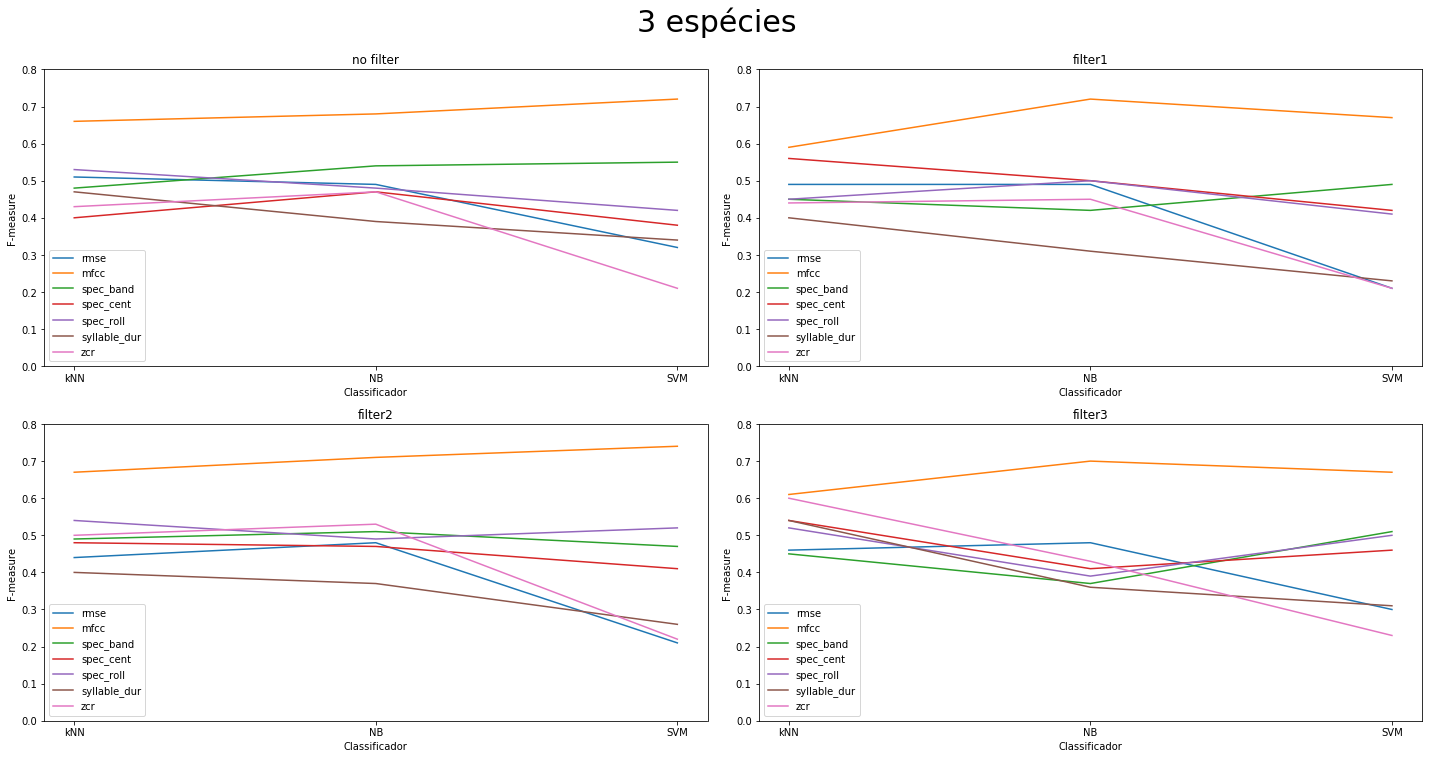

In [318]:
all_data_t3 = my_plots.transpose_matrices(all_data3)
my_plots.line_plot_data(all_data_t3, 2, 2, '3 espécies', ['no filter', 'filter1', 'filter2', 'filter3'], 'Classificador', 'F-measure', util.FEATURES_PLOT, util.CLASSIFIERS)

In [319]:
all_data5 = my_plots.matrix_from_table('../experiments/hashes/5spc.txt')
all_data_t5 = my_plots.transpose_matrices(all_data5)

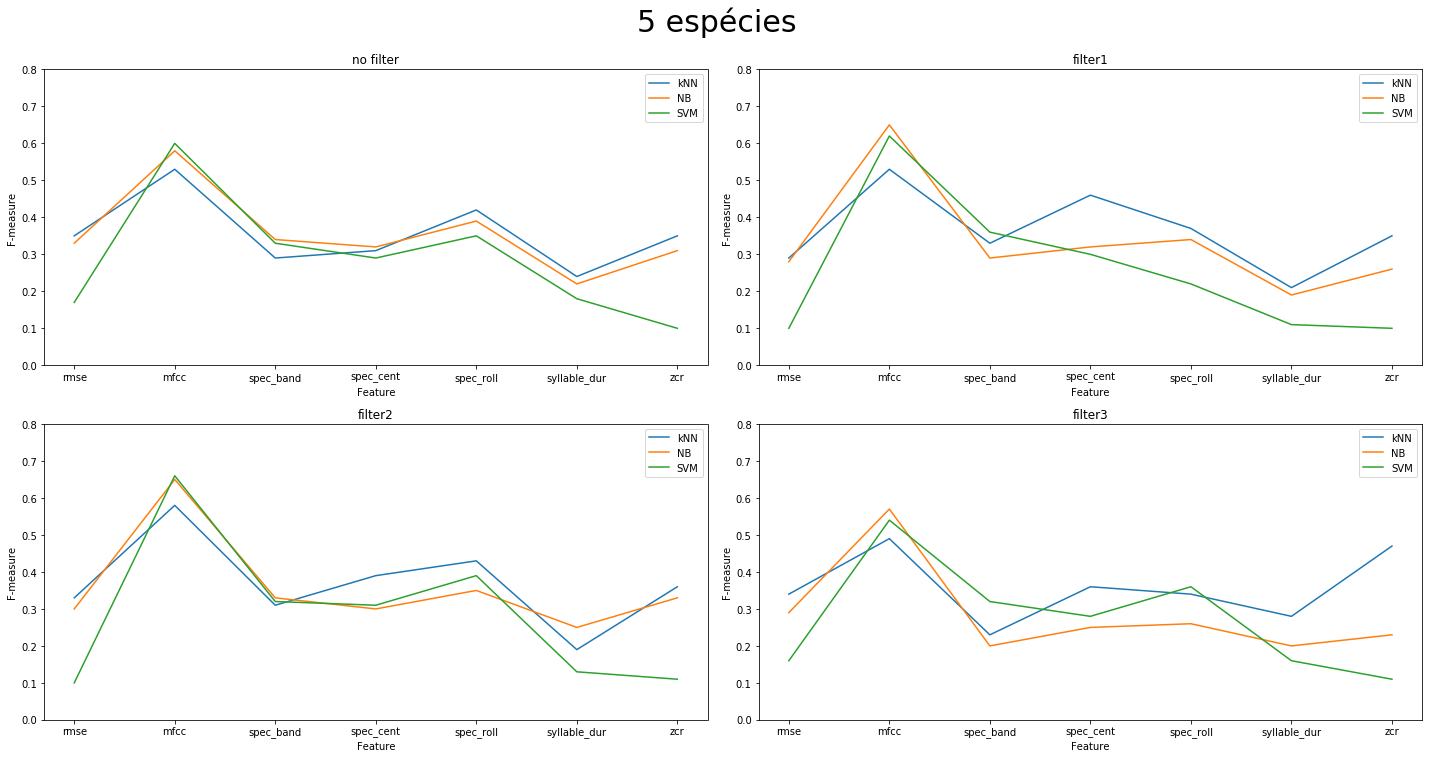

In [320]:
my_plots.line_plot_data(all_data5, 2, 2, '5 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

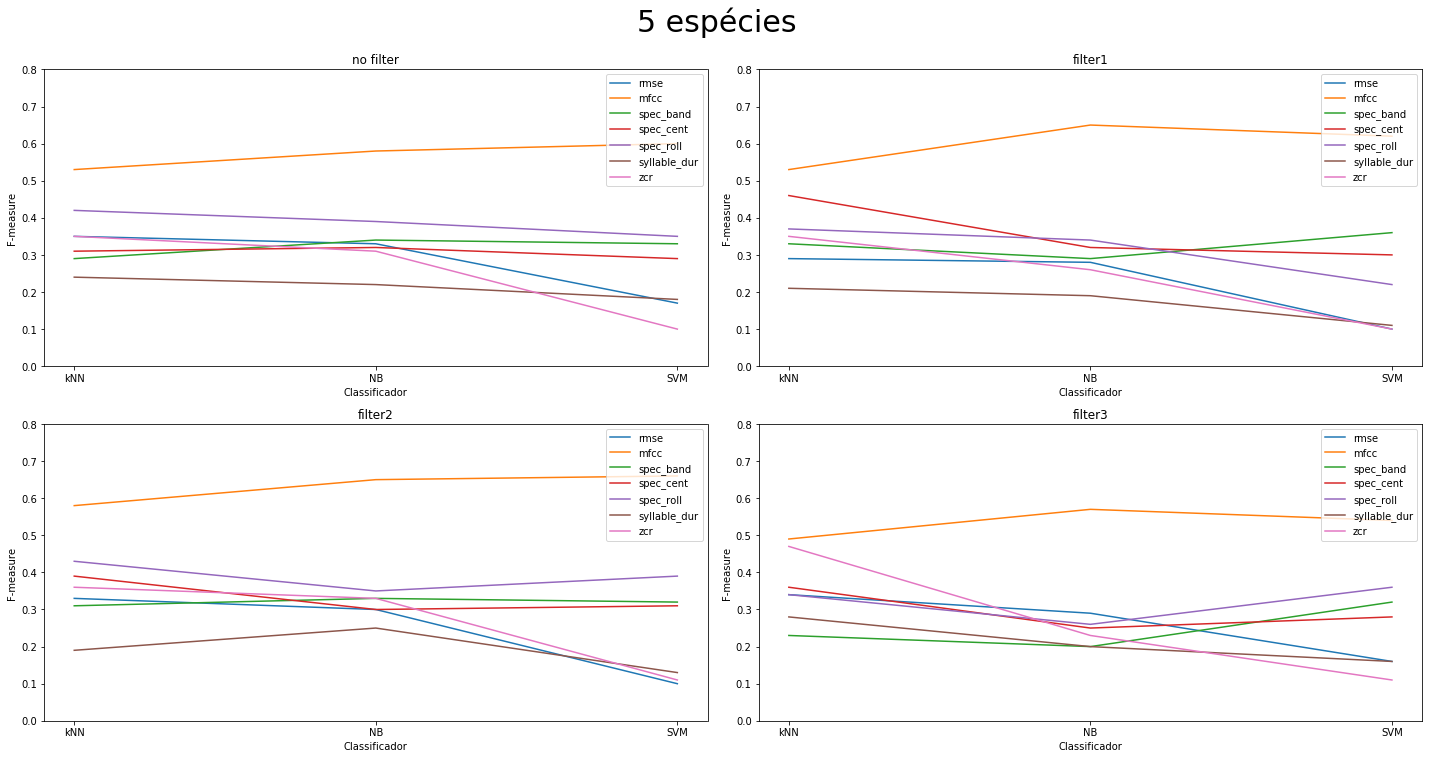

In [321]:
my_plots.line_plot_data(all_data_t5, 2, 2, '5 espécies', ['no filter', 'filter1', 'filter2', 'filter3'], 'Classificador', 'F-measure', util.FEATURES_PLOT, util.CLASSIFIERS)

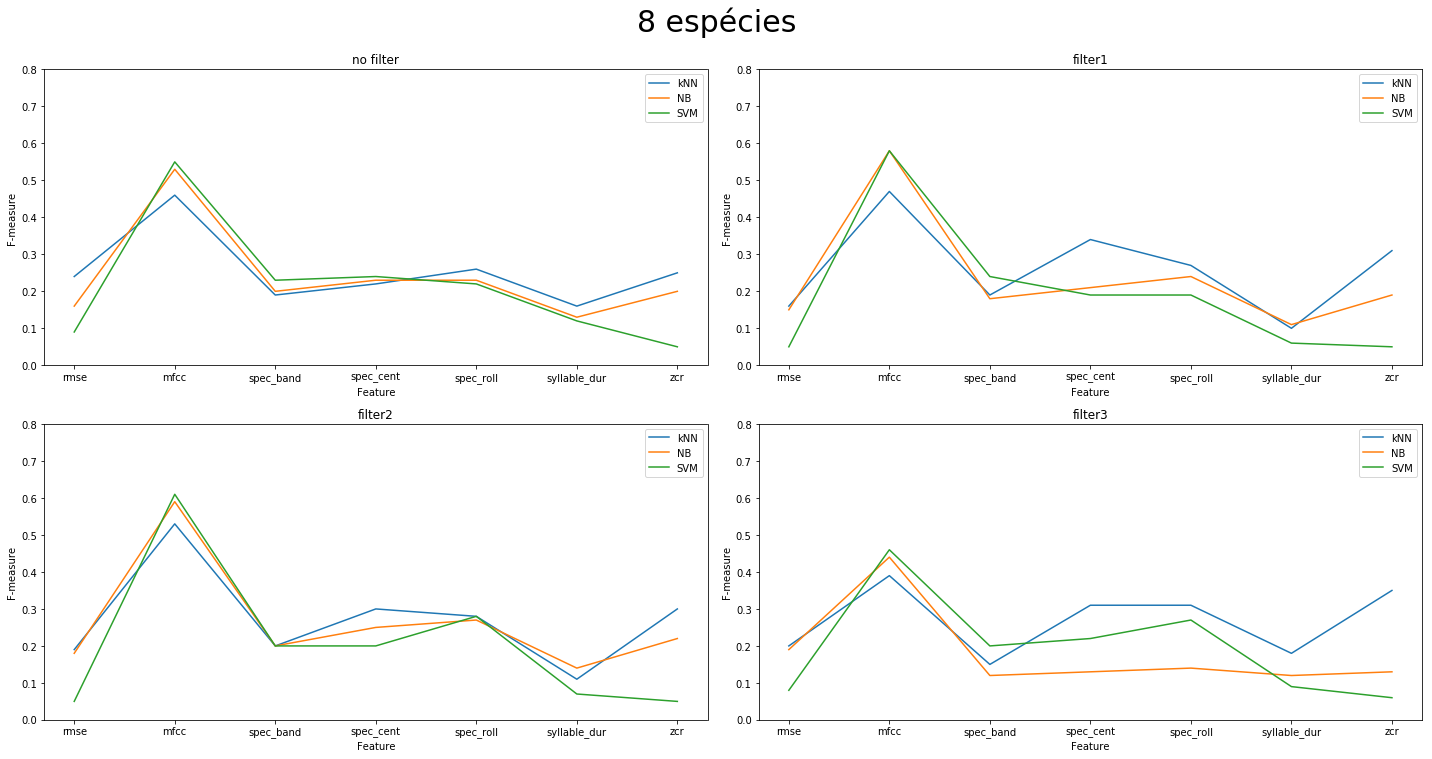

In [322]:
all_data8 = my_plots.matrix_from_table('../experiments/hashes/8spc.txt')
all_data_t8 = my_plots.transpose_matrices(all_data8)
my_plots.line_plot_data(all_data8, 2, 2, '8 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

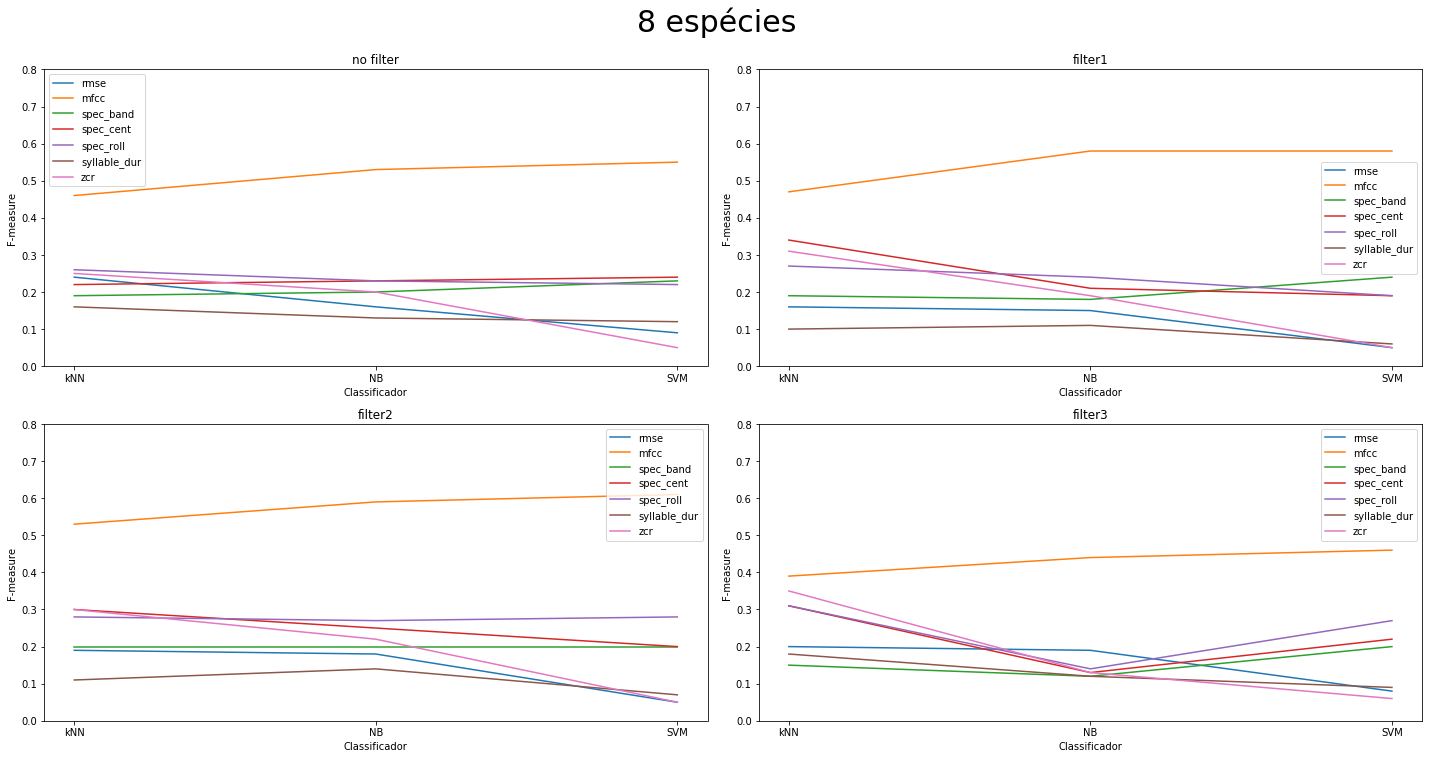

In [323]:
my_plots.line_plot_data(all_data_t8, 2, 2, '8 espécies', ['no filter', 'filter1', 'filter2', 'filter3'], 'Classificador', 'F-measure', util.FEATURES_PLOT, util.CLASSIFIERS)

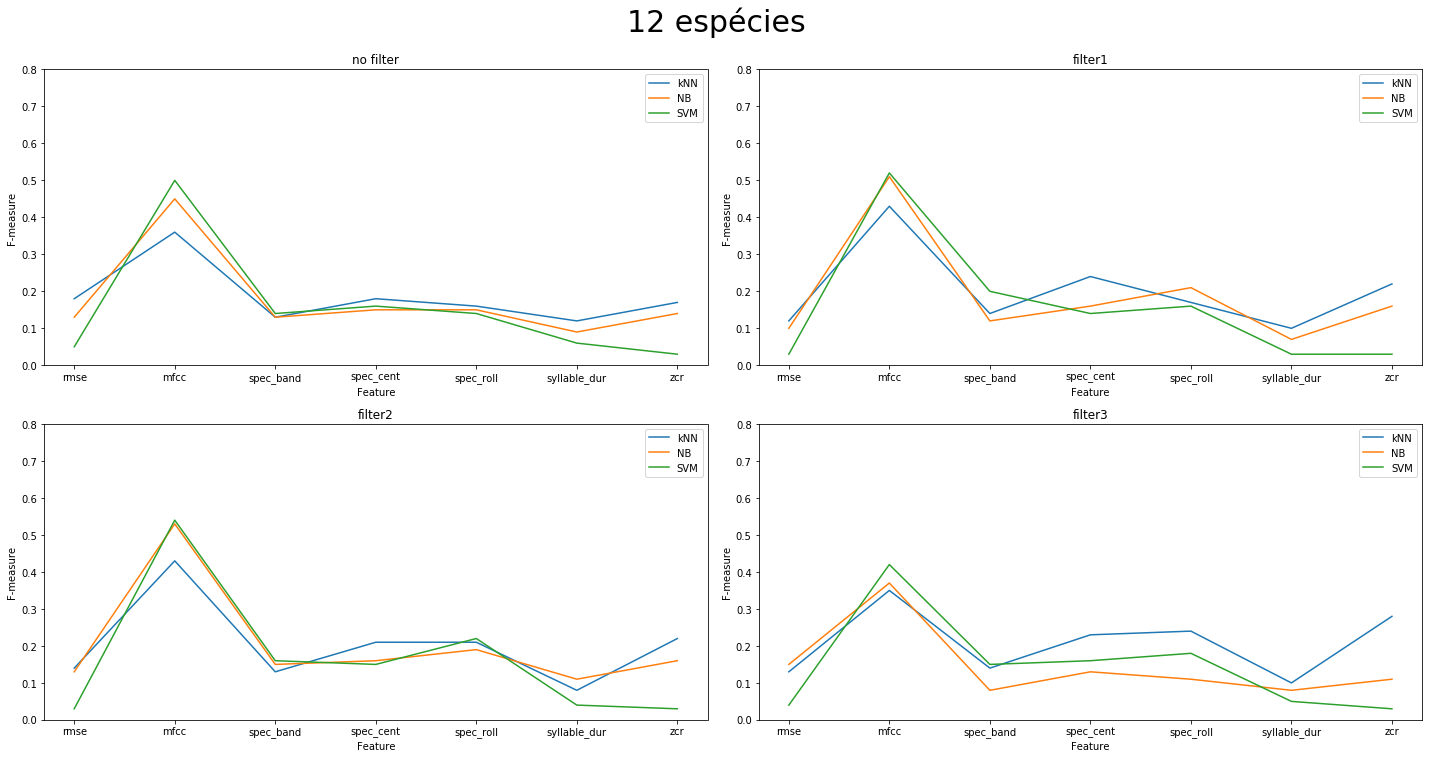

In [324]:
all_data12 = my_plots.matrix_from_table('../experiments/hashes/12spc.txt')
all_data_t12 = my_plots.transpose_matrices(all_data12)
my_plots.line_plot_data(all_data12, 2, 2, '12 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

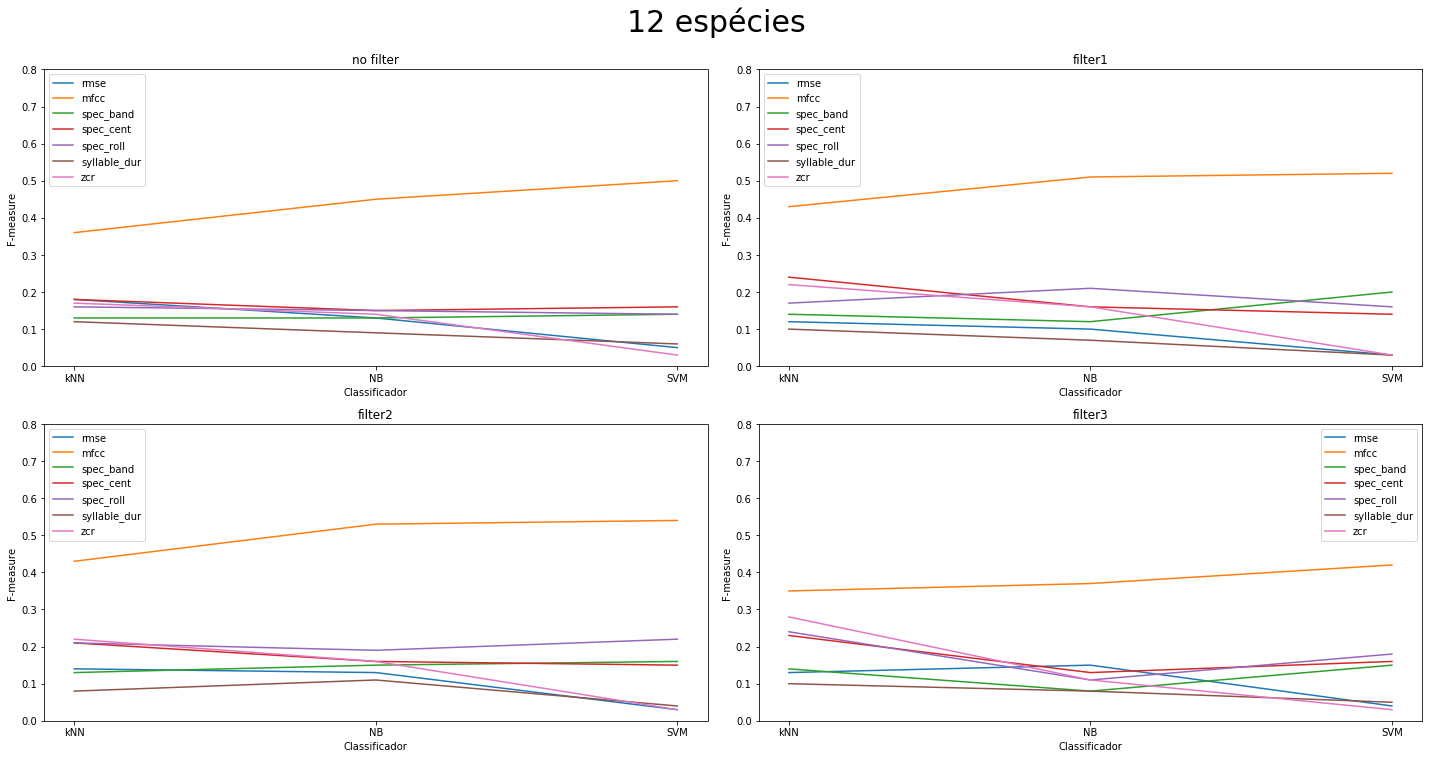

In [325]:
my_plots.line_plot_data(all_data_t12, 2, 2, '12 espécies', ['no filter', 'filter1', 'filter2', 'filter3'], 'Classificador', 'F-measure', util.FEATURES_PLOT, util.CLASSIFIERS)

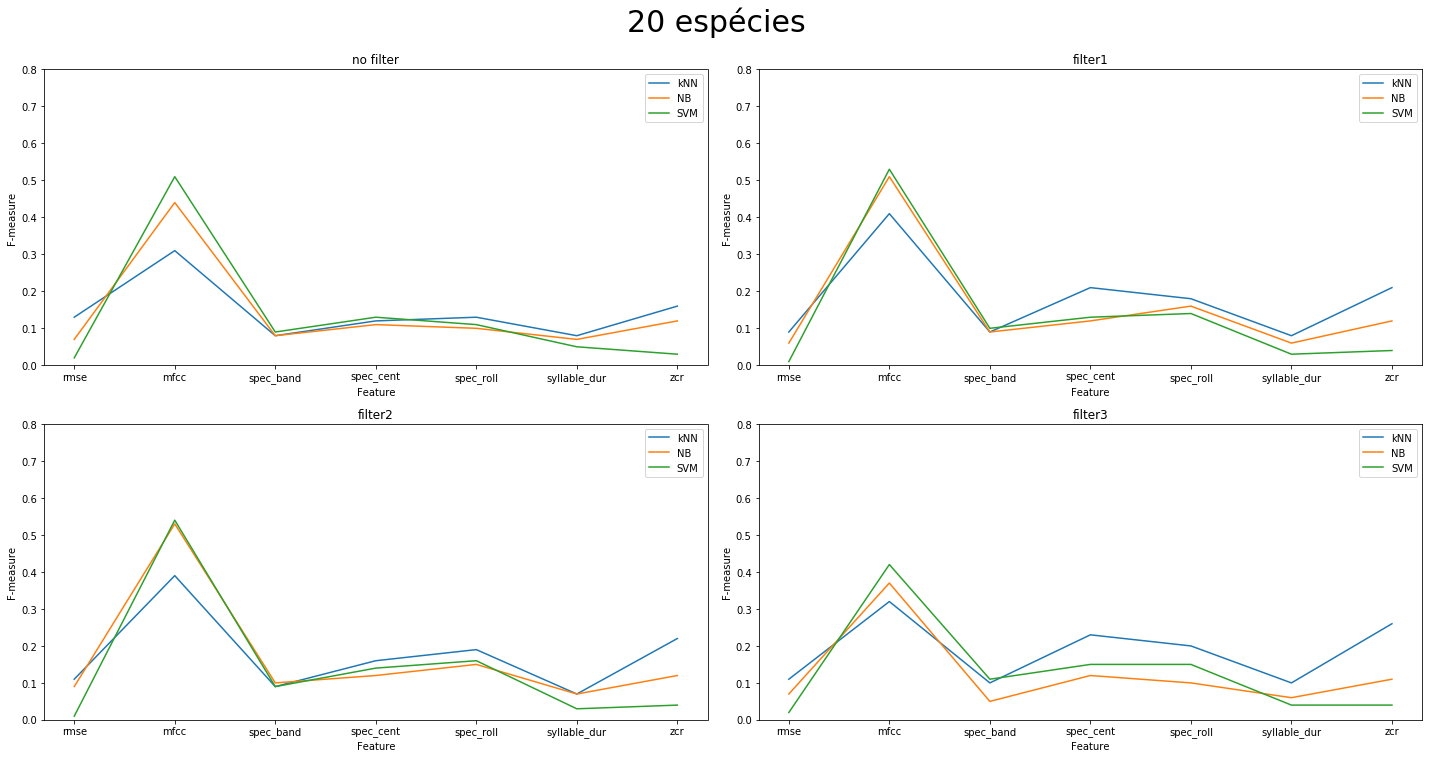

In [326]:
all_data20 = my_plots.matrix_from_table('../experiments/hashes/20spc.txt')
all_data_t20 = my_plots.transpose_matrices(all_data20)
my_plots.line_plot_data(all_data20, 2, 2, '20 espécies',['no filter', 'filter1', 'filter2', 'filter3'], 'Feature', 'F-measure', util.CLASSIFIERS, util.FEATURES_PLOT )

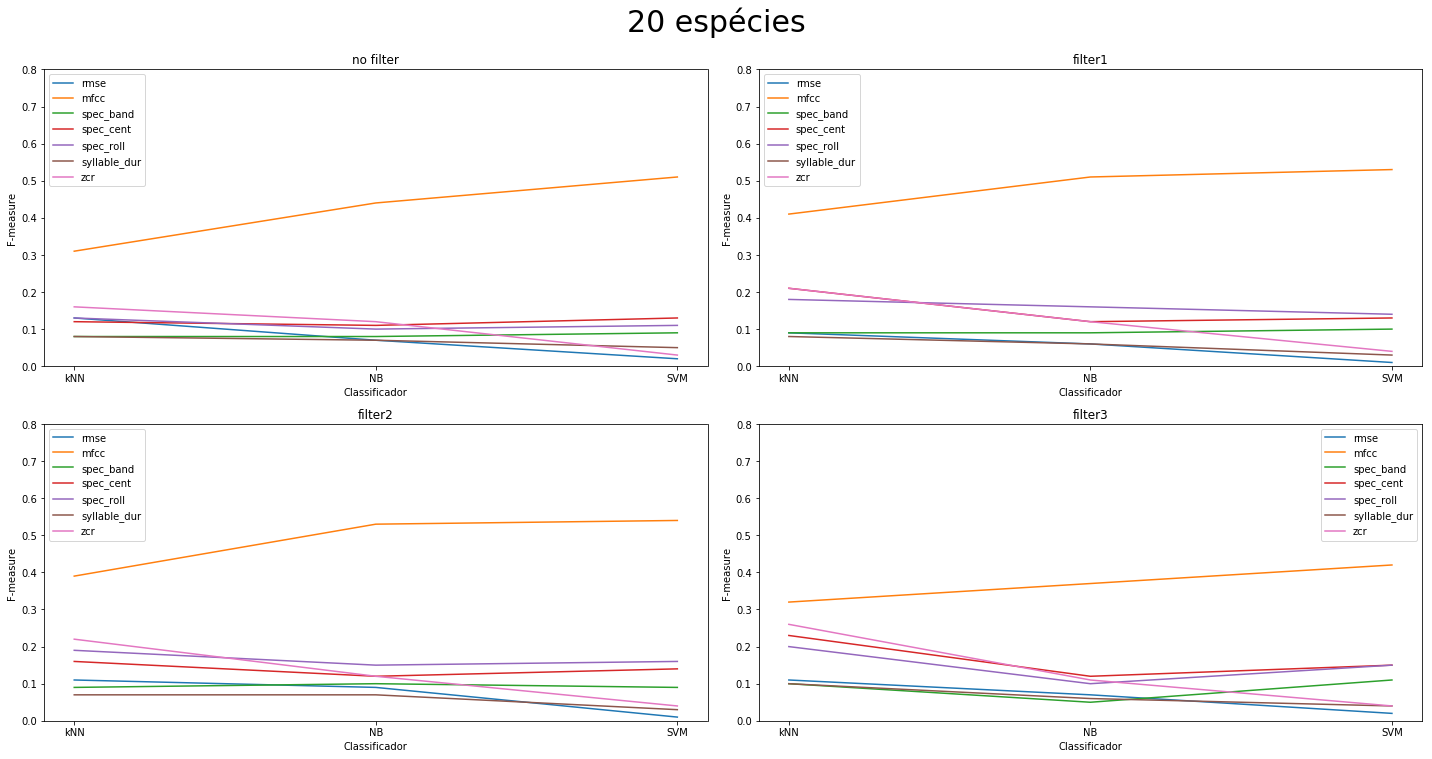

In [327]:
my_plots.line_plot_data(all_data_t20, 2, 2, '20 espécies', ['no filter', 'filter1', 'filter2', 'filter3'], 'Classificador', 'F-measure', util.FEATURES_PLOT, util.CLASSIFIERS)

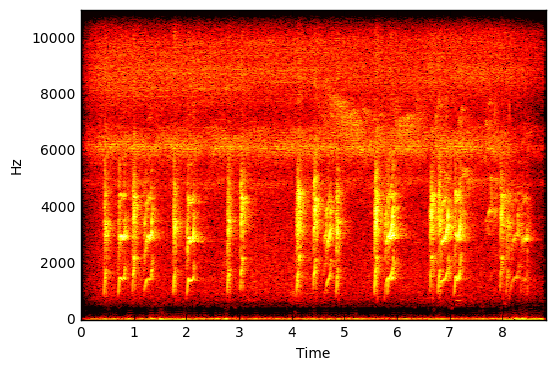

In [25]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'hot')


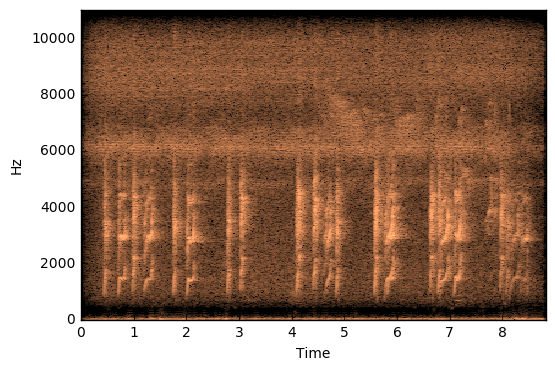

In [28]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'copper')


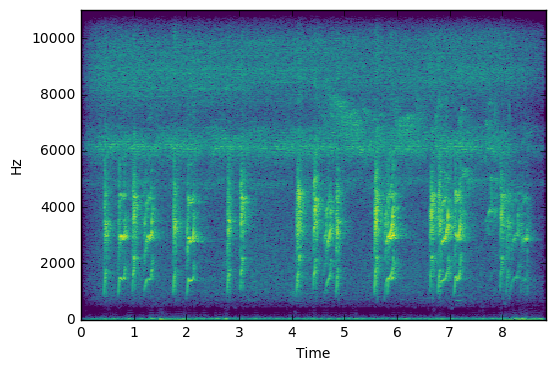

In [30]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'viridis')


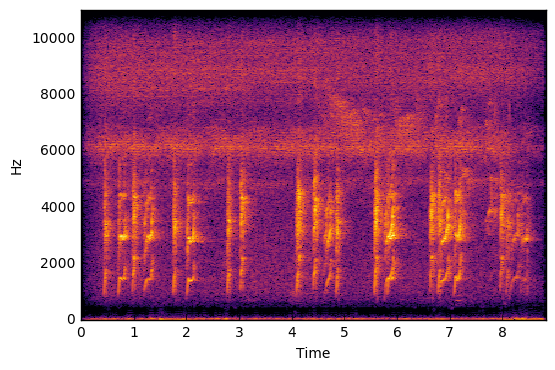

In [35]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time', cmap = 'inferno')
